# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Load the csv

In [2]:
df = pd.read_csv(r'housing.csv')

# Initial Data Investigation

## Dataframe Shape

In [3]:
df.shape

(20640, 10)

## Check the first 5 rows

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Check the last 5 rows

In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Check the data types of each column

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Dataframe Statistics

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Initial Data Investigation Findings
- The dataset contains 10 columns (features) and 20,640 rows (samples)
- The 'ocean_proximity' variable is a categorical variable and not a numerical type like the remaining columns
- There may be more useful features that could be engineered from multiple features

# Data Cleaning

## Check for missing values
The 'total_bedrooms' column contains missing values

In [8]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## View all rows where 'total_bedrooms' is null
There is 207 rows of data where total_bedrooms is null

In [9]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


## If we want to drop (but we will impute instead)

In [10]:
#df.dropna()

## Impute with mean
Rather than disposing 207 samples of data, we can impute the missing values using an average value. First, we will test the mean value.

In [11]:
mean_val = df['total_bedrooms'].mean()
print(mean_val)
df['total_bedrooms'].fillna(mean_val, inplace=True)

537.8705525375618


In [12]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

## Example of data with mean imputted

In [13]:
df.iloc[290]

longitude                -122.16
latitude                   37.77
housing_median_age          47.0
total_rooms               1256.0
total_bedrooms        537.870553
population                 570.0
households                 218.0
median_income              4.375
median_house_value      161900.0
ocean_proximity         NEAR BAY
Name: 290, dtype: object

## Drop duplicate data

In [14]:
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Histograms

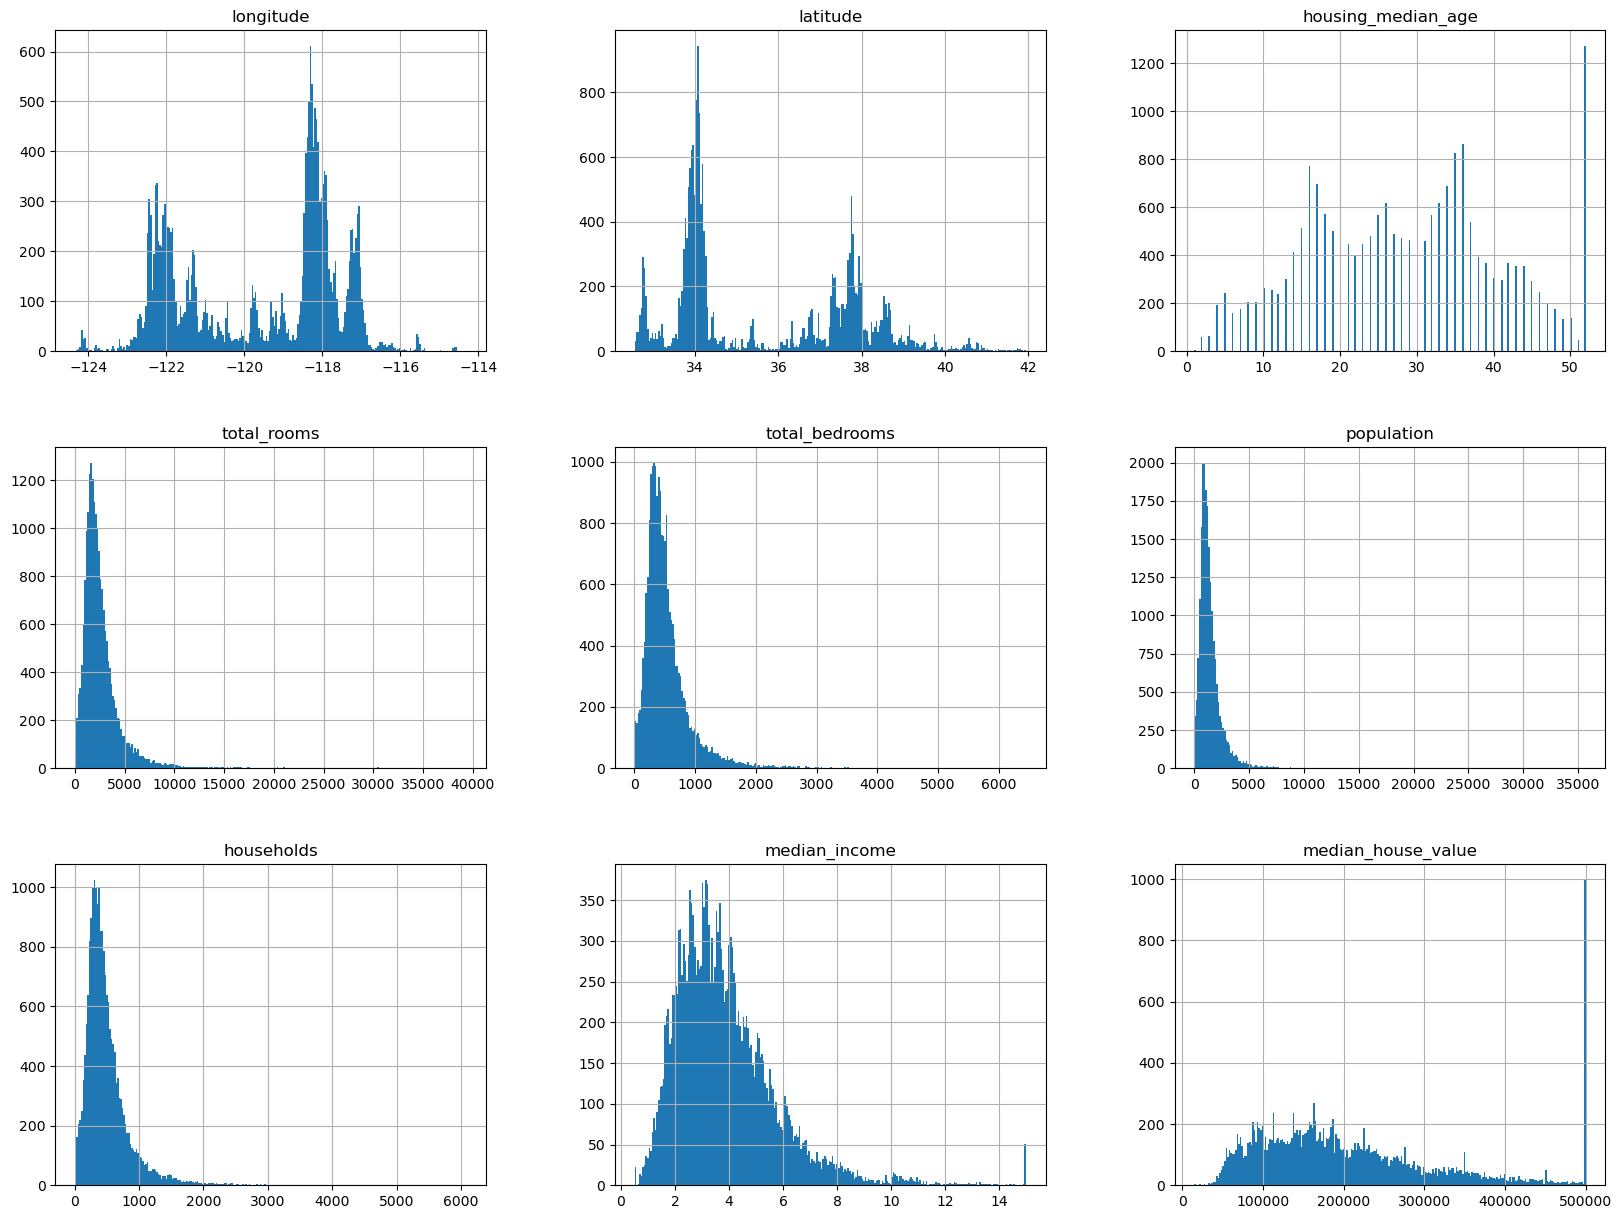

In [15]:
df.hist(bins=250, figsize=(20, 15));

When looking at 'median_house_value', there's an unusually high frequency at 500,000. This could indicate that the median house value was capped at 500,000, which could wrongly represent the data distribution and lead to incorrect predictions. Because of this, we can remove all values above 500,000.

In [16]:
df = df[df['median_house_value'] < 500000]

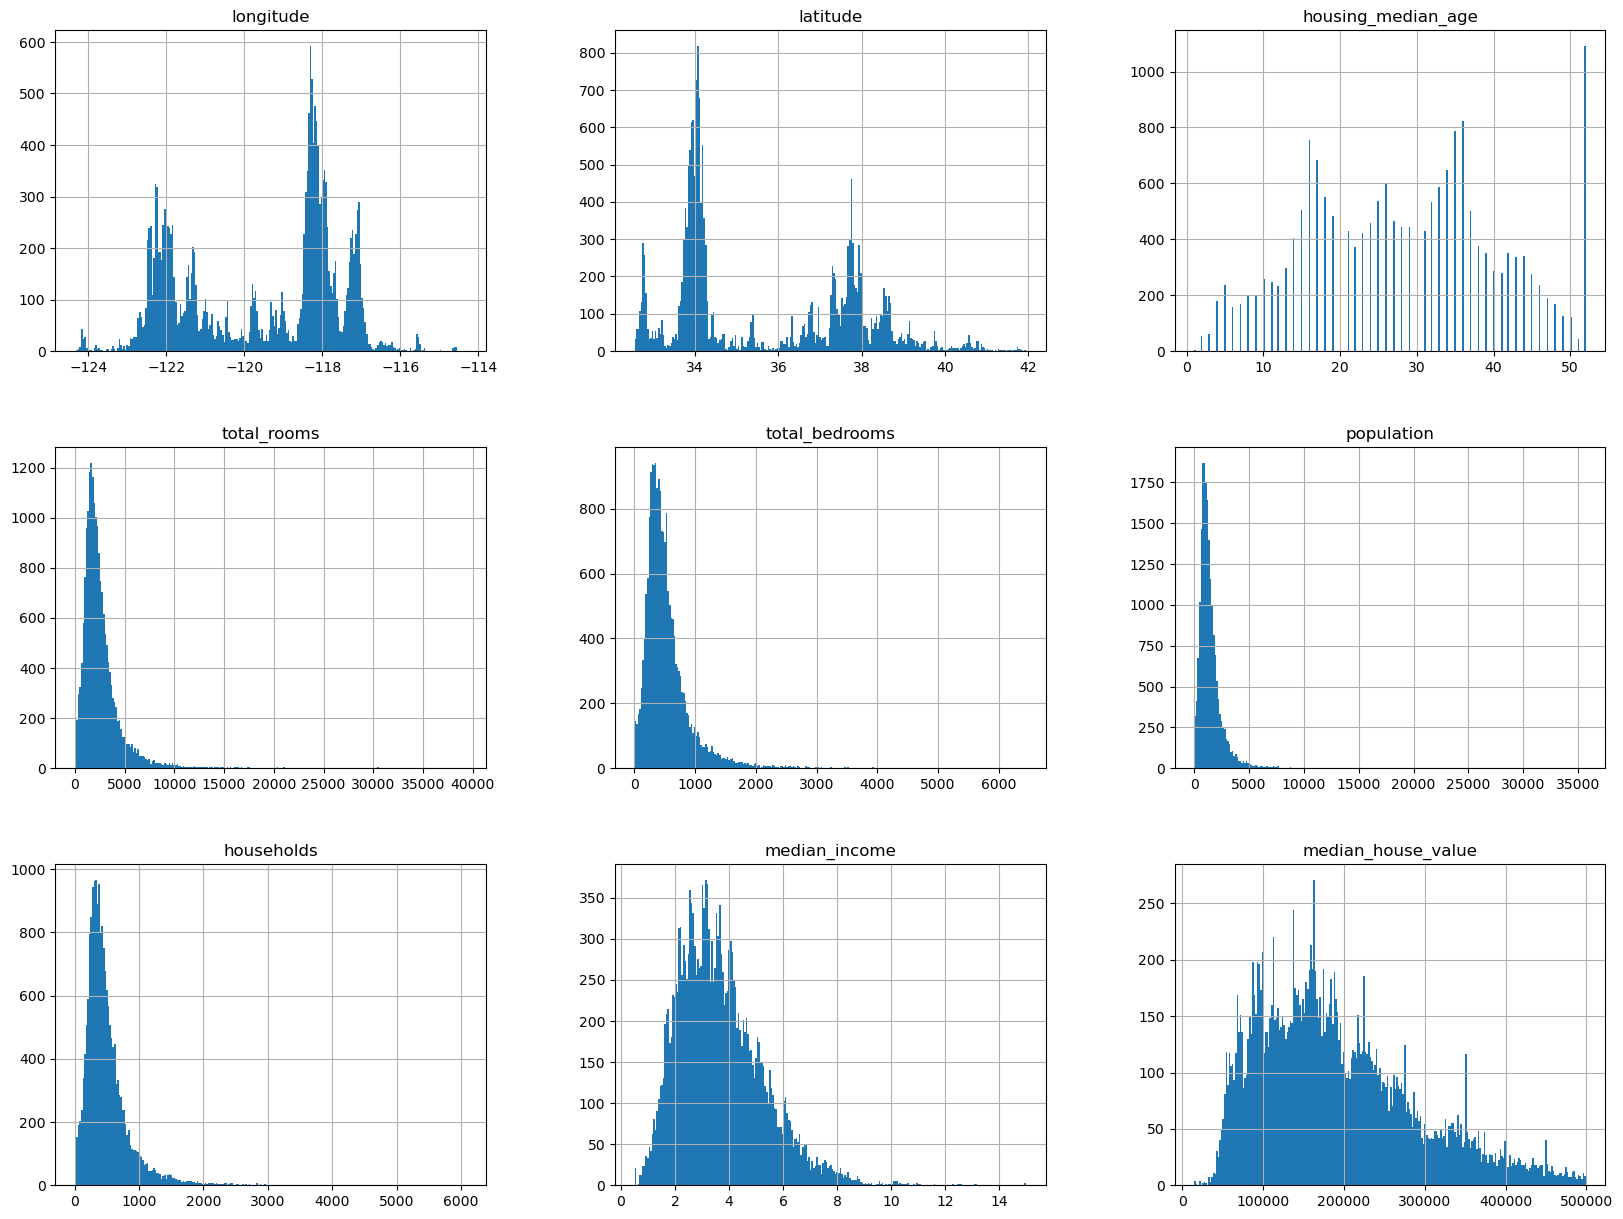

In [17]:
df.hist(bins=250, figsize=(20, 15));

'housing_median_age' appears horizontally symetrical in its distribution, except for a similar spike at the highest values. To correct the distribution, we can remove these high values.

In [18]:
df = df[df['housing_median_age'] < 52]

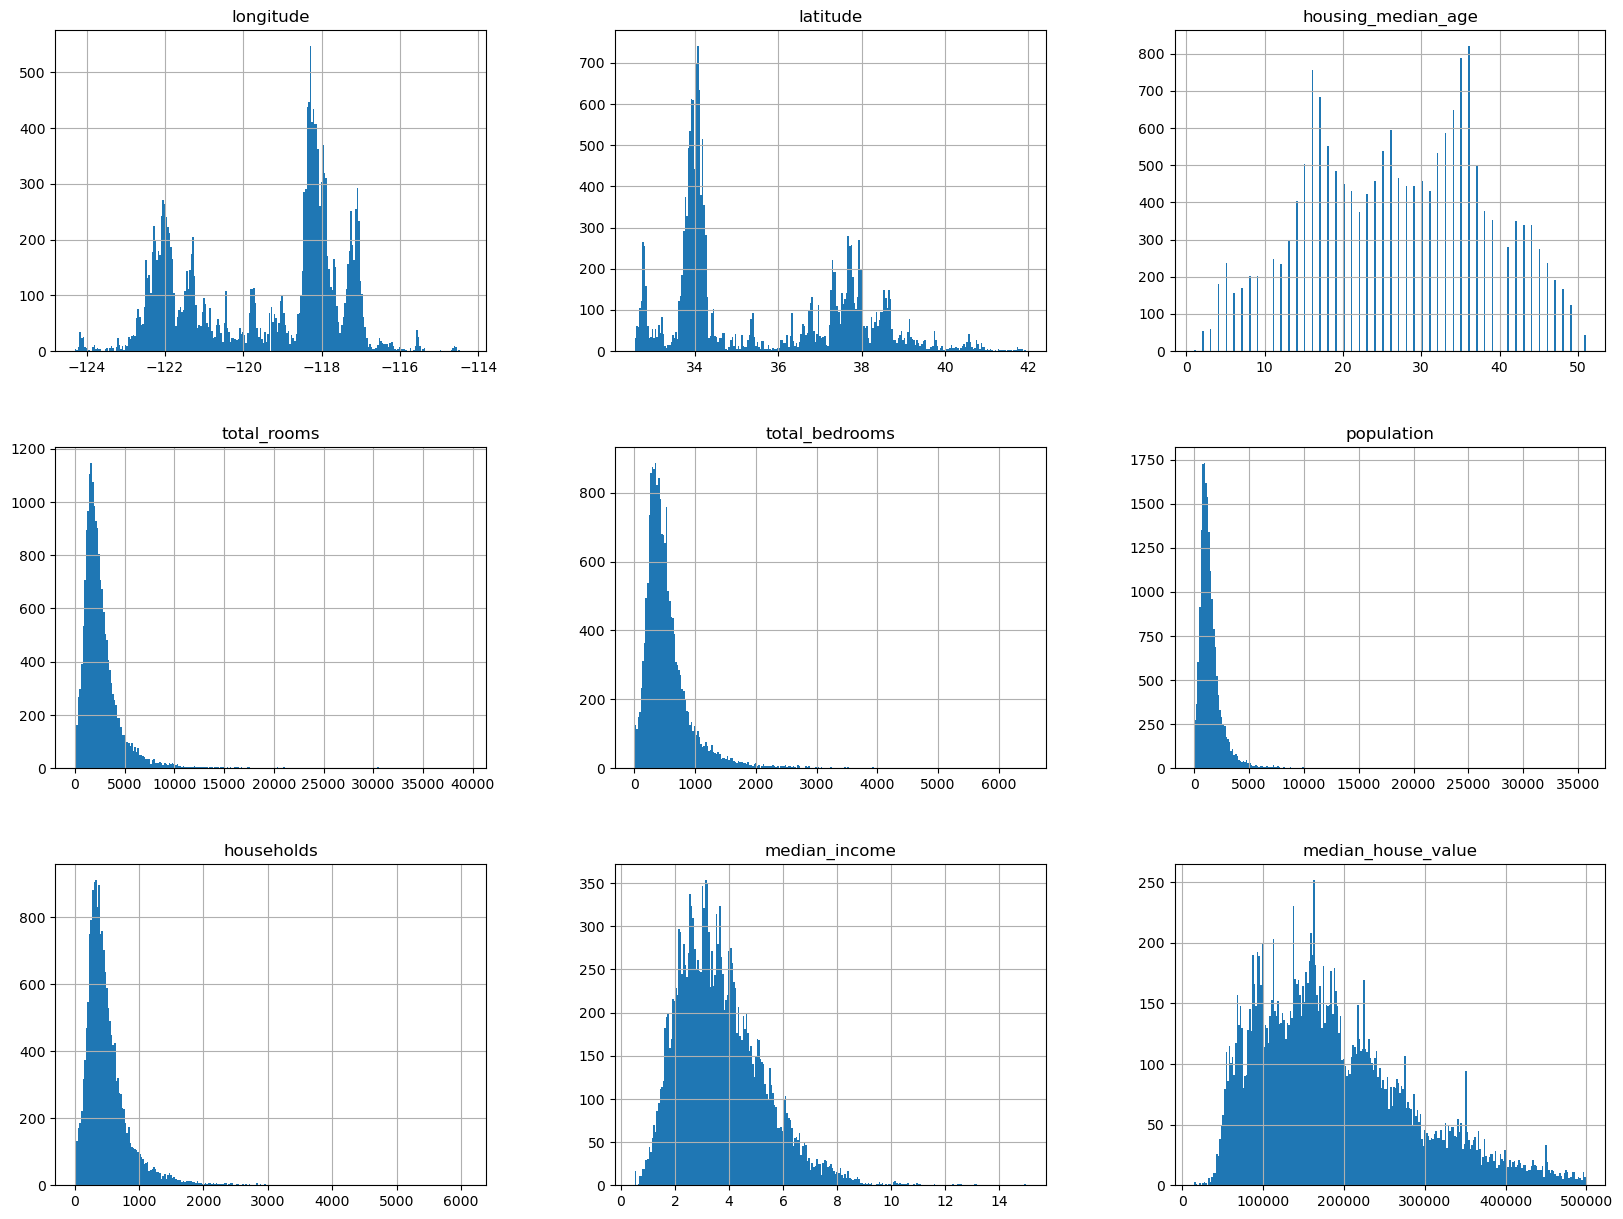

In [19]:
df.hist(bins=250, figsize=(20, 15));

# Feature Engineering

We can create some new features, such as:
- 'rooms_per_household', by dividing the 'total_rooms' by 'households'
- 'bedrooms_per_room', by dividing 'total_bedrooms' by 'total_rooms'
- 'population_per_household', by dividing 'population' by 'households'

We can assess how well correlated this data is with the 'median_house_value' to see which features we should keep or drop.

In [20]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

df_no_op = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_op.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.664340
total_rooms                 0.153887
rooms_per_household         0.115232
households                  0.100565
total_bedrooms              0.079425
population                  0.022542
housing_median_age          0.014121
population_per_household   -0.020193
longitude                  -0.022901
latitude                   -0.171565
bedrooms_per_room          -0.210477
Name: median_house_value, dtype: float64

As 'rooms_per_household' is more correlated with 'median_house_value' than 'households' used to engineer it, **'households' can be removed** with its low correlation.

**'total_bedrooms' can be removed** due to its very low correlation with 'median_house_value' after being used to engineer 'bedrooms_per_room' which has a very high correlation.

Engineered feature, **'population_per_household', can be removed**, due to its low correlation with 'median_house_value'.

In [21]:
# Drop the original features
# households, total_bedrooms, population_per_household
# df = df.drop(['population', 'housing_median_age', 'population_per_household'], axis=1)
# df = df.drop(['households', 'total_bedrooms', 'population_per_household'], axis=1)
df = df.drop(['total_bedrooms', 'population', 'housing_median_age', 'population_per_household'], axis=1)

df_no_op = df.drop(['ocean_proximity'], axis=1)
corr_matrix = df_no_op.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.664340
total_rooms            0.153887
rooms_per_household    0.115232
households             0.100565
longitude             -0.022901
latitude              -0.171565
bedrooms_per_room     -0.210477
Name: median_house_value, dtype: float64

### Removing anomalies

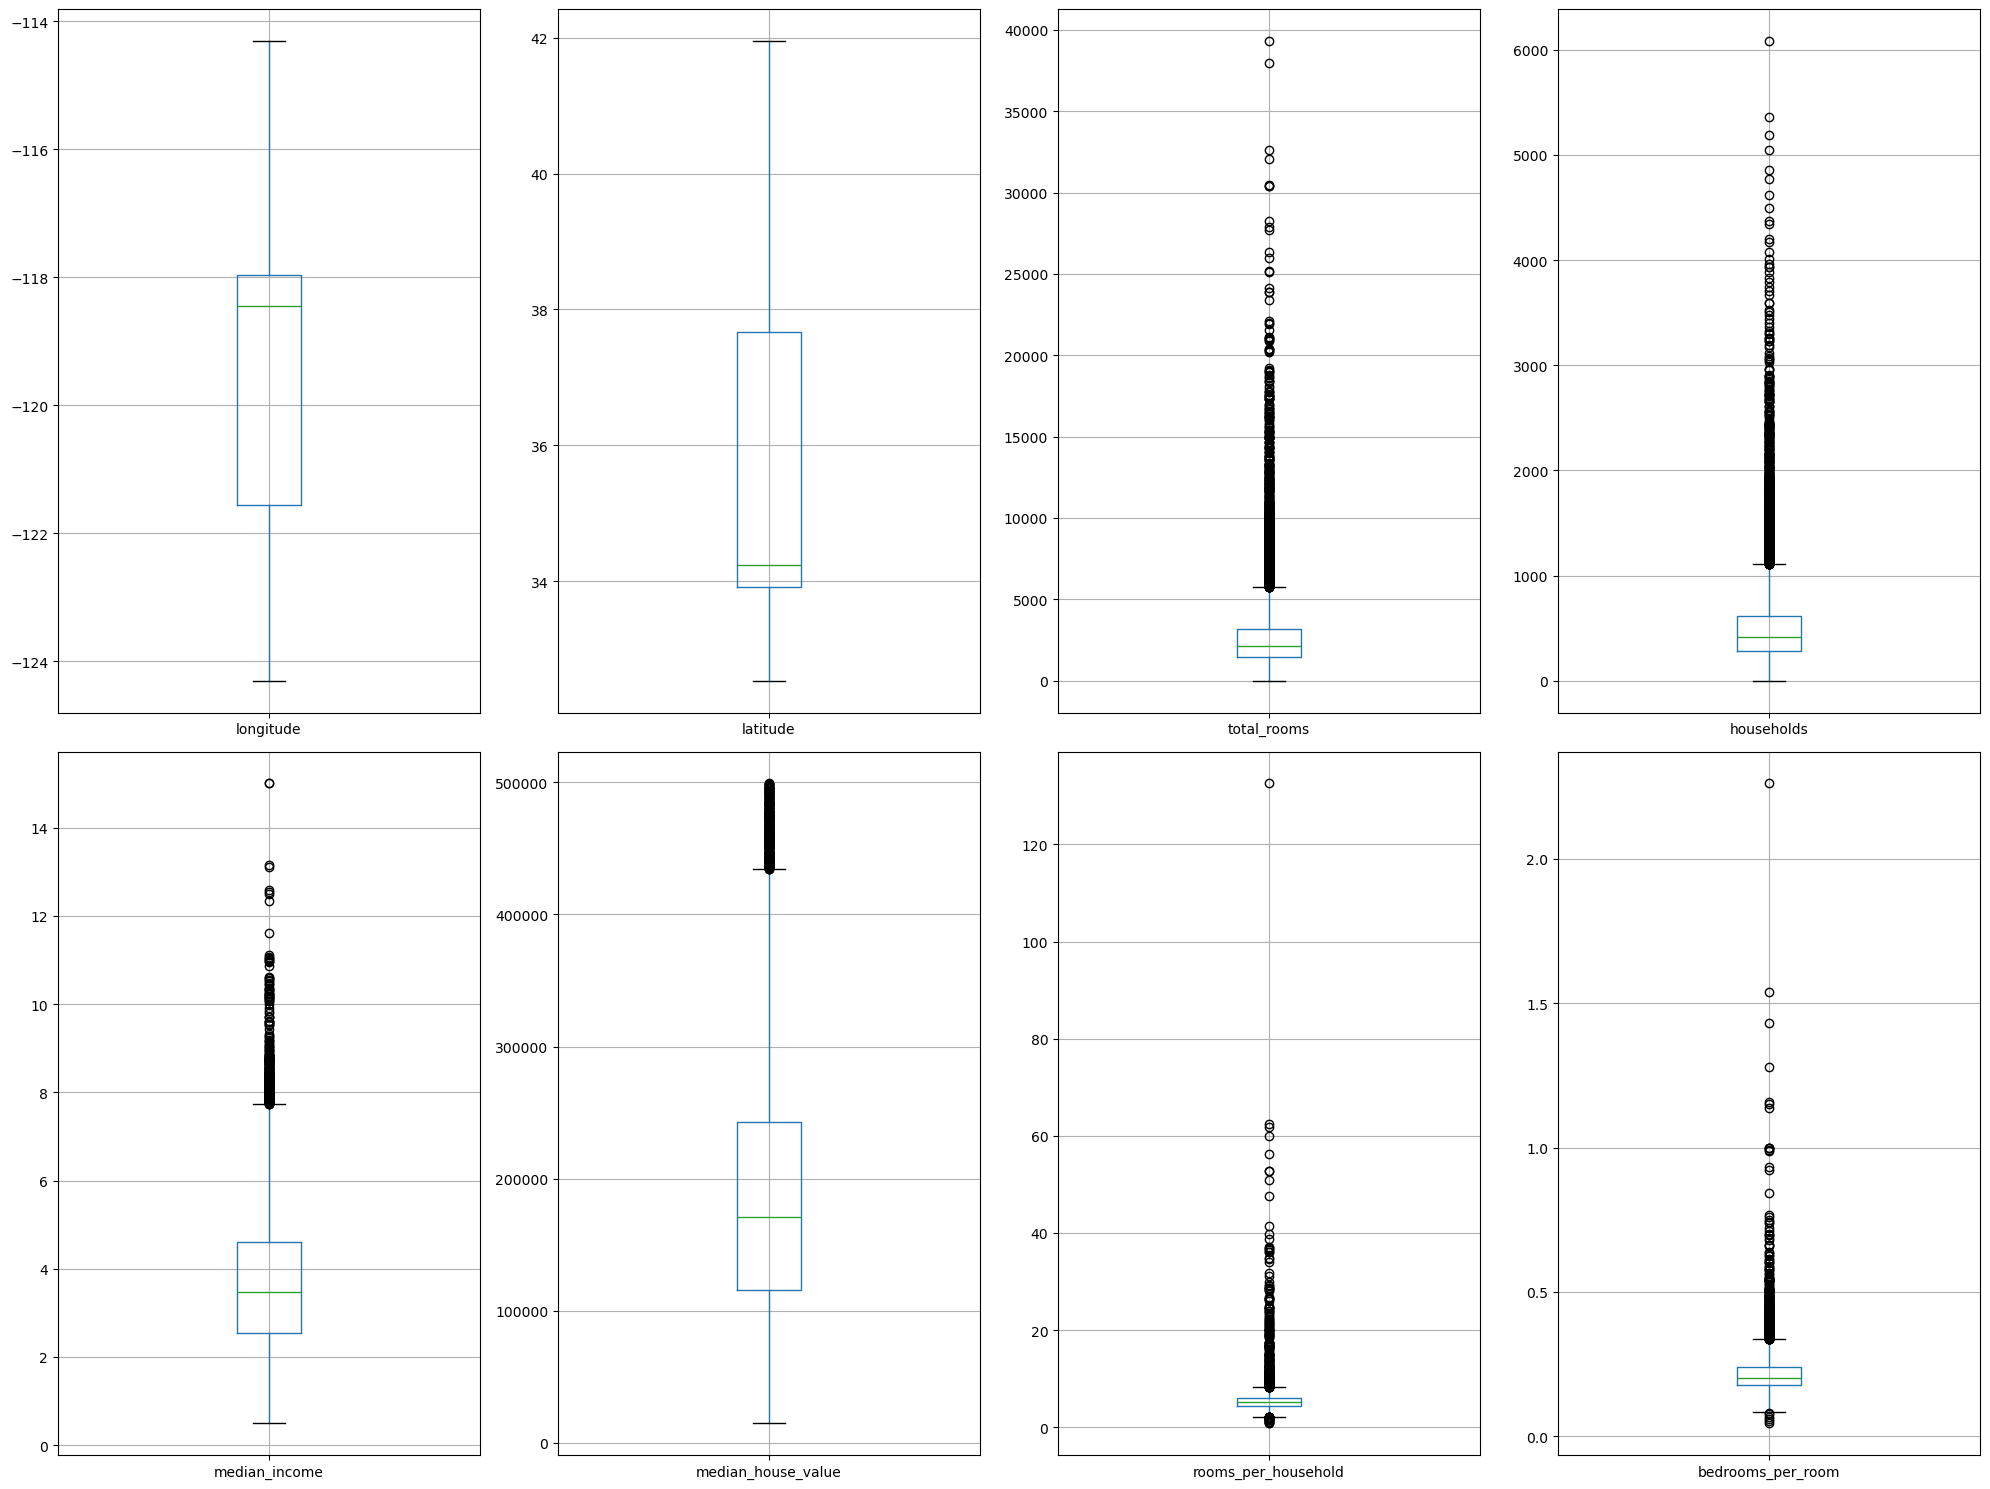

In [22]:
df_no_op = df.drop(['ocean_proximity'], axis=1)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(len(df_no_op.columns)//4, 4, figsize=(20, 15))

# Flatten the array of axes
axes = axes.flatten()

# Loop over the columns of the dataframe and the flat array of axes
for ax, col in zip(axes, df_no_op.columns):
    # Create a boxplot for each column on a separate subplot
    df_no_op.boxplot(column=col, ax=ax)

# Remove any unused subplots
for i in range(len(df_no_op.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

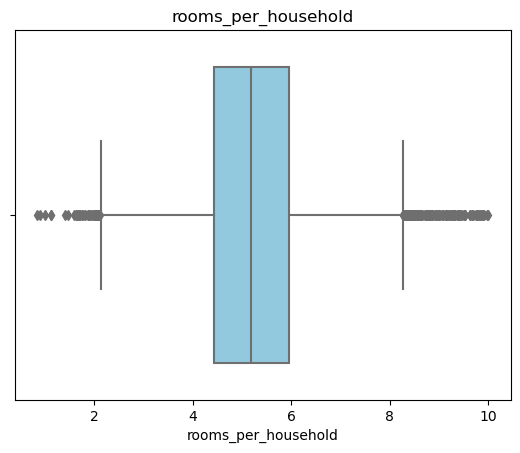

(18345, 9)


In [23]:
df = df[df['rooms_per_household'] <= 10]

sns.boxplot(x=df['rooms_per_household'], color='skyblue')
plt.title('rooms_per_household')
plt.show()

print(df.shape)

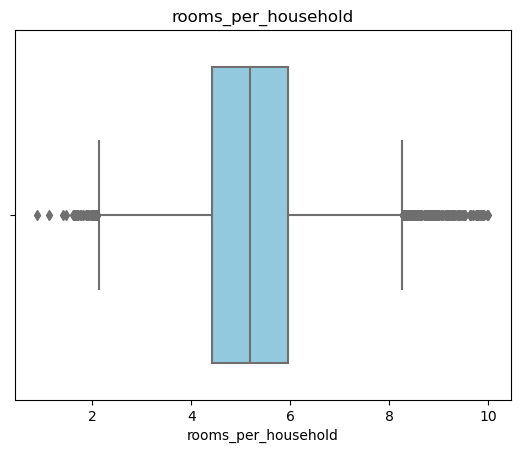

(18328, 9)


In [24]:
# remove anomalies
df = df[df['bedrooms_per_room'] <= 0.75]

sns.boxplot(x=df['rooms_per_household'], color='skyblue')
plt.title('rooms_per_household')
plt.show()

print(df.shape)

# # apply square-root
# df.loc[:, 'bedrooms_per_room'] = np.sqrt(df['bedrooms_per_room'])

## Test for skew

In [25]:
for col in df.select_dtypes(include=[np.number]).columns:
    skewness = df[col].skew()
    if skewness > 1:
        print(f"Positive Skew,  {skewness:.2f},  {col}")
    elif skewness < -1:
        print(f"Negative Skew,  {skewness:.2f},  {col}")
    else:
        print(f"Minimal Skew,   {skewness:.2f},  {col}")

Minimal Skew,   -0.35,  longitude
Minimal Skew,   0.53,  latitude
Positive Skew,  4.22,  total_rooms
Positive Skew,  3.40,  households
Minimal Skew,   0.85,  median_income
Minimal Skew,   0.82,  median_house_value
Minimal Skew,   0.30,  rooms_per_household
Positive Skew,  1.93,  bedrooms_per_room


# Encode ocean_proximity

In [31]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8306
INLAND        6141
NEAR OCEAN    2315
NEAR BAY      1564
ISLAND           2
Name: count, dtype: int64

In [33]:
one_hot_encoder = OneHotEncoder()

ocean_proximity_one_hot = one_hot_encoder.fit_transform(df[['ocean_proximity']])

In [34]:
ocean_proximity_one_hot

<18328x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18328 stored elements in Compressed Sparse Row format>

In [35]:
ocean_proximity_one_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [36]:
# Convert the numpy array to a DataFrame
categories_df = pd.DataFrame(ocean_proximity_one_hot.toarray(), columns=one_hot_encoder.categories_[0], index=df.index) # its important to ensure the indexes match!

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df.drop('ocean_proximity', axis=1), categories_df], axis=1)

In [37]:
categories_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
15,0.0,0.0,0.0,1.0,0.0
18,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [38]:
df

,longitude,latitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0


# Check for correlations between features

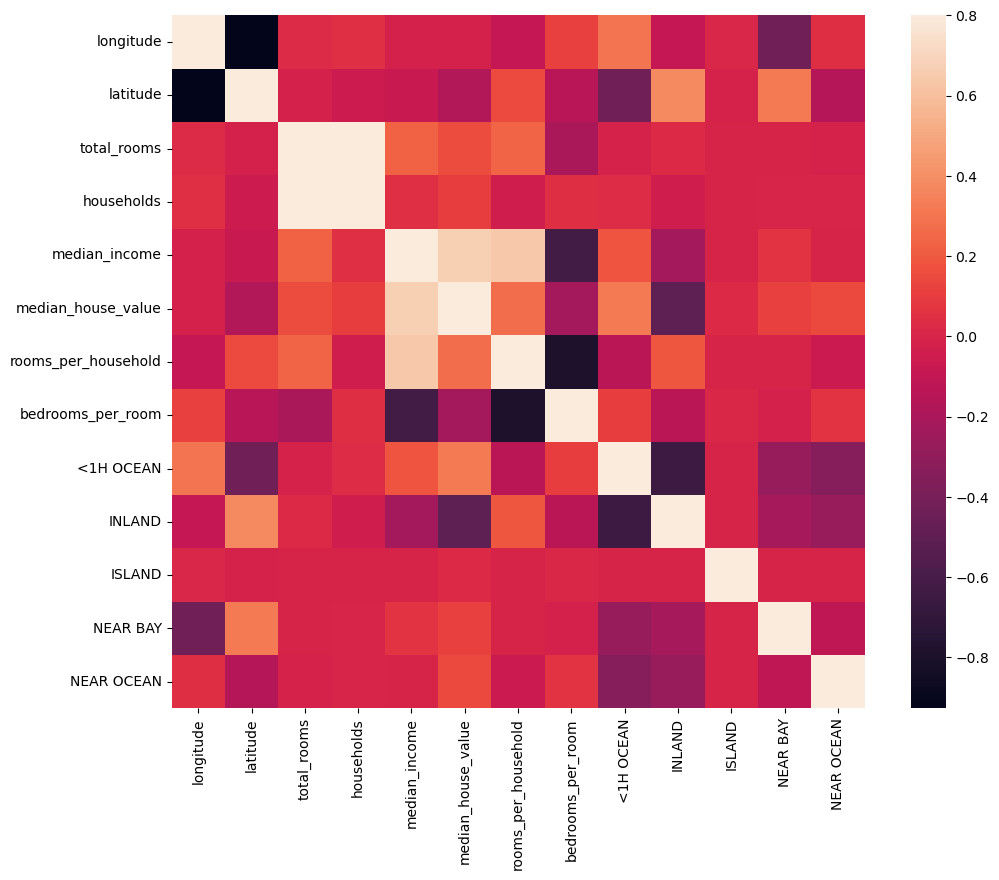

In [39]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Based on this correlation matrix, the longitude and latitude are highly correlated. We could consider removing one of these features as a multicollinearity is present. It would appear that latitude has a higher skew than the longitude, so we will drop the latitude feature.

In [40]:
df

,longitude,latitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0,0.0


In our encoded 'ocean_proximity' variable, we only actually need n-1 features (where n is the number of features), to represent the 'ocean_proximity' feature. Because of this and to reduce the dimensionality of our model, we can drop one of these features.

In [42]:
df = df.drop(['ISLAND'], axis=1)
df

,longitude,latitude,total_rooms,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,126.0,8.3252,452600.0,6.984127,0.146591,0.0,0.0,1.0,0.0
1,-122.22,37.86,7099.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.0,0.0,1.0,0.0
8,-122.26,37.84,2555.0,595.0,2.0804,226700.0,4.294118,0.260274,0.0,0.0,1.0,0.0
15,-122.26,37.85,1120.0,264.0,2.1250,140000.0,4.242424,0.252679,0.0,0.0,1.0,0.0
18,-122.26,37.84,2239.0,419.0,1.9911,158700.0,5.343675,0.203216,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,330.0,1.5603,78100.0,5.045455,0.224625,0.0,1.0,0.0,0.0
20636,-121.21,39.49,697.0,114.0,2.5568,77100.0,6.114035,0.215208,0.0,1.0,0.0,0.0
20637,-121.22,39.43,2254.0,433.0,1.7000,92300.0,5.205543,0.215173,0.0,1.0,0.0,0.0
20638,-121.32,39.43,1860.0,349.0,1.8672,84700.0,5.329513,0.219892,0.0,1.0,0.0,0.0


# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

# Define features and target
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler

print(X_train.iloc[0])

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0])

longitude              -122.00000
latitude                 36.97000
total_rooms            1029.00000
households              249.00000
median_income             3.12050
rooms_per_household       4.13253
bedrooms_per_room         0.23518
<1H OCEAN                 0.00000
INLAND                    0.00000
NEAR BAY                  0.00000
NEAR OCEAN                1.00000
Name: 18539, dtype: float64
[-1.26059144  0.64032327 -0.74602386 -0.67801973 -0.36130098 -0.94639819
  0.36687575 -0.90866688 -0.7125031  -0.30435153  2.63080287]


# Model Creation

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_train, y_train)

prediction = model.predict(X_test)

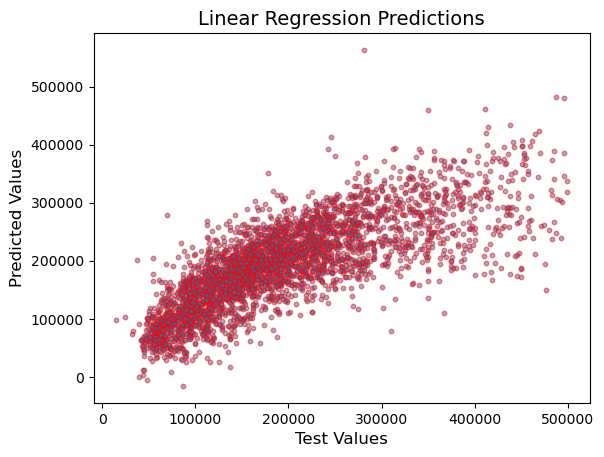

R^2 Score: 0.6060340349591706
Mean Absolute Error: 44595.896845517345
Mean Squared Error: 3633416463.008257
Root Mean Squared Error: 60277.82729170202
Mean Absolute Percentage Error: 26.663892025716052%


In [48]:
fig, ax = plt.subplots()

ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Linear Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

## Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt.fit(X_train, y_train)

# Make predictions using the testing set
prediction = dt.predict(X_test)

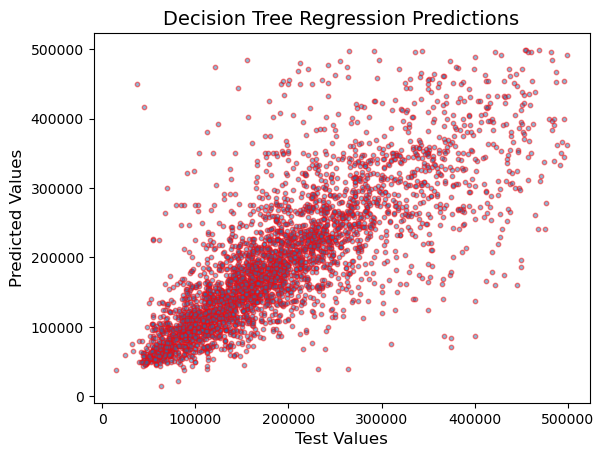

R^2 Score: 0.5803047576120648
Mean Absolute Error: 40985.54337152209
Mean Squared Error: 3870708991.2716856
Root Mean Squared Error: 62215.02223154538
Mean Absolute Percentage Error: 23.524209912202494%


In [50]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Decision Tree Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

## Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)

rf.fit(X_train, y_train)

prediction = rf.predict(X_test)

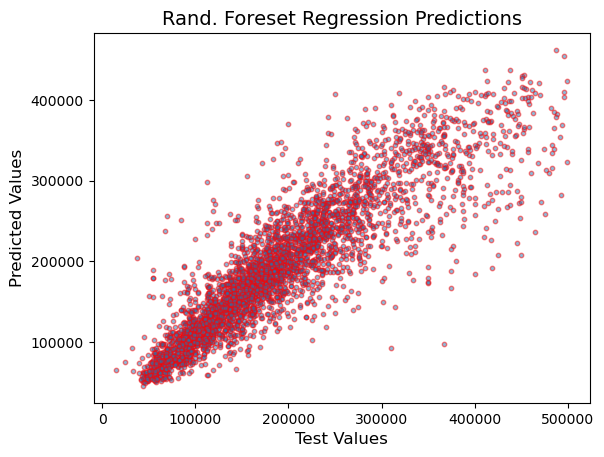

R^2 Score: 0.7915171851042769
Mean Absolute Error: 29616.707079105294
Mean Squared Error: 1922767343.1584833
Root Mean Squared Error: 43849.371069132605
Mean Absolute Percentage Error: 17.027125813721394%


In [52]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Rand. Foreset Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

### Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf,
                         X_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)

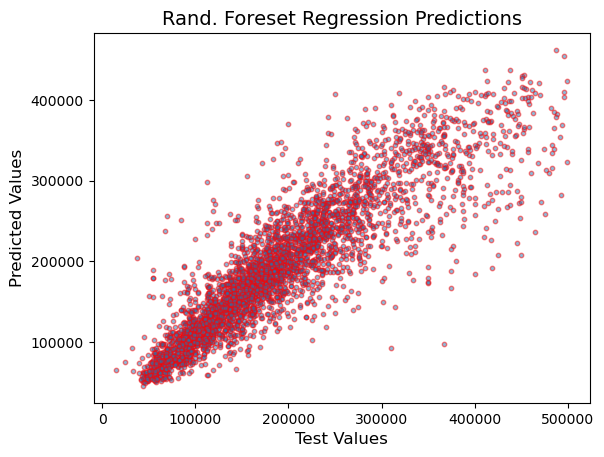

R^2 Score: 0.7915171851042769
Mean Absolute Error: 29616.707079105294
Mean Squared Error: 1922767343.1584833
Root Mean Squared Error: 43849.371069132605
Mean Absolute Percentage Error: 17.027125813721394%


In [54]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('Rand. Foreset Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

In [55]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [
    {'n_estimators': [10, 100],
     'max_features': [2, 8 ,13],
     'max_depth': [2, 10, None],
     }
]

grid_search = GridSearchCV(rf,
                           parameter_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             param_grid=[{'max_depth': [2, 10, None],
                          'max_features': [2, 8, 13],
                          'n_estimators': [10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)

prediction = svr.predict(X_test)

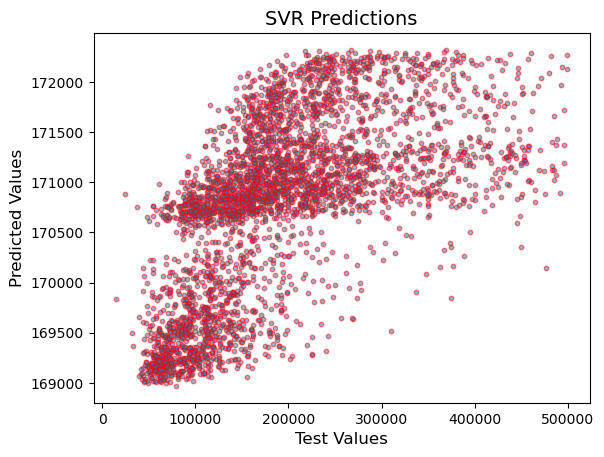

R^2 Score: -0.03566056429197939
Mean Absolute Error: 74337.68584519917
Mean Squared Error: 9551551347.835125
Root Mean Squared Error: 97732.03849217064
Mean Absolute Percentage Error: 47.83799797741601%


In [57]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)
ax.set_title('SVR Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
plt.show()

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')
mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')